### **New York City Airbnb**

### **Business Problem Understanding**

**Context**

AirBnB is an online marketplace platform for people who wants to rent their property either as a hotel room, hostel, even an entire home/property such as villa even their own home/property. The interaction that occurs in AirBnB is AirBnB as a two sided platform or the third party where the host who wants to rent their property submit their property, set the price, accepted and it will be in the AirBnB platform. The visitor who need an accomodation will find what they need in AirBnB, book it from AirBnB application and contact the host.

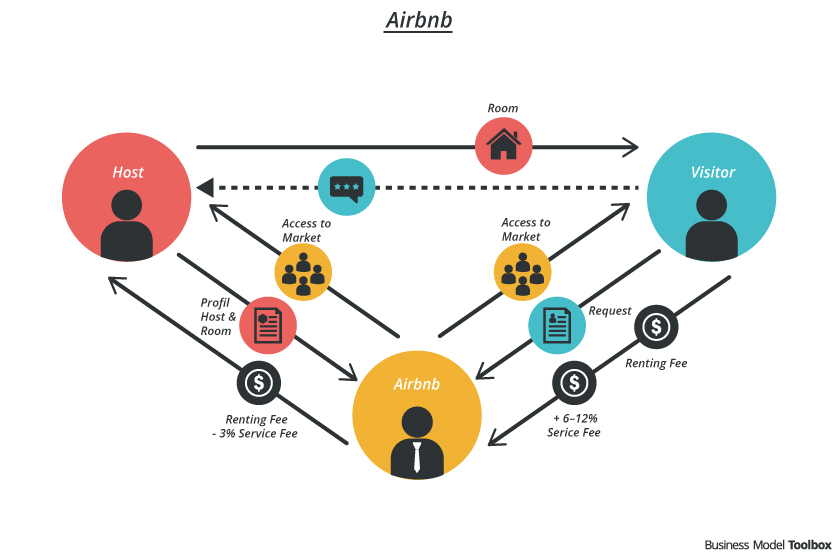
[Image Source](https://bmtoolbox.net/stories/airbnb/)

AirBnB has been operating since 2008 and has covered more than 150 country around the world. Based on [New York City planning](https://www1.nyc.gov/site/planning/planning-level/nyc-population/population-facts.page), New york city as one of the most populated city in USA has been taking part for the growth of AirBnB Business, which is a lot of tourist need an accomodation to stay.

**Problem Statement**

One of the issue is how the host able to set the suitable price within others similar type of property and within the areas, that's because Airbnb offers hosts a complete freedom to set the price for their own property, providing only minimal clues that allow hosts to compare similar places in their neighborhood for competitive prices.

**Goals**

From the issue, Air BnB needs to make an analysis based on the demographics what kind of prperty most of people rent and which area and neighborhood a lot of people rent, so AirBnB can support client to set the suitable price.

### **Data Understanding**

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| id | Integer | Listing ID |
| name | Object | Name of the listing |
| host_id | Integer | Host ID |
| host_name | Object | Name of the host |
| neighbourhood_group | Object | Location |
| neighbourhood | Object | Area |
| latitude | Float | Latitude coordinates |
| longitude | Float | Longitude coordinates |
| room_type | Object | Listing space type |
| price | Integer | Price in dollars |
| minimum_nights | Integer | Amount of nights minimum |
| number_of_reviews | Integer | Number of reviews |
| last_review | Object | Latest review |
| reviews_per_month | Float | Number of reviews per month |
| calculated_host_listings_count | Integer | Amount of listing per host |
| availability_365 | Integer | Number of days when listing is available for booking |

<br>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Data Preprocessing**

In [62]:
df2 = df.copy()

In [8]:
datadesc = []
for i in df2.columns:
    datadesc.append([i,
                     df2[i].dtypes,
                     df2[i].isna().sum(),
                     round((df2[i].isna().sum()/len(df2)*100),2),
                     df2[i].nunique(),
                     df2[i].drop_duplicates().sample(1).values])

pd.DataFrame(datadesc,columns=['Data Features',
                               'Data Types',
                               'Null',
                               'Null Percentage',
                               'Unique',
                               'Unique Sample'])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.00,48895,[15875061]
1,name,object,16,0.03,47905,[Couch with breakfast included and a view!]
2,host_id,int64,0,0.00,37457,[140293912]
3,host_name,object,21,0.04,11452,[Leesa]
4,neighbourhood_group,object,0,0.00,5,[Bronx]
5,neighbourhood,object,0,0.00,221,[Two Bridges]
6,latitude,float64,0,0.00,19048,[40.66028]
7,longitude,float64,0,0.00,14718,[-73.99066]
8,room_type,object,0,0.00,3,[Shared room]
9,price,int64,0,0.00,674,[434]


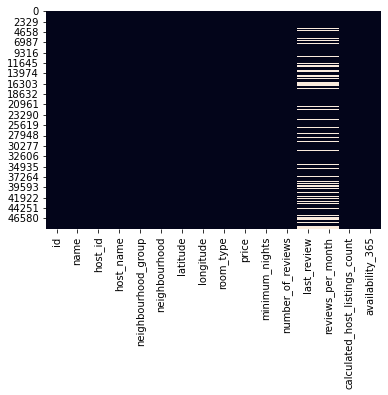

In [9]:
sns.heatmap(df2.isnull(), cbar=False);

There are four features with missing value. which is 'last_review' dan 'reviews_per_month' with the same amount of missing value with almost 21% from total data, the other two is feature 'name' and 'host_name' this two feature will not be used so we are goting to drop this four feature

**Drop Columns**

In [63]:
df2.drop(['id', 'host_id', 'name', 'host_name', 'reviews_per_month'], axis=1, inplace=True)

In [11]:
df2.duplicated().sum()

0

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.1+ MB


**Missing Value**

In [64]:
df2.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [65]:
df2['last_review'] = pd.to_datetime(df2['last_review'])

In [66]:
print(min(df2['last_review']))
print(max(df2['last_review']))

2011-03-28 00:00:00
2019-07-08 00:00:00


In [70]:
df2 = df2[(df2['last_review'] > '2011-07-08')]

In [71]:
# Cek kembali dataset info
df2.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [73]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df2.columns if ((df2[feature].dtypes != 'object'))]
df2[num_features].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000,38840.000000
mean,40.728134,-73.951147,142.314676,5.868306,29.299382,5.164083,114.885350
std,0.054992,0.046696,196.951230,17.385432,48.187759,26.296409,129.546482
min,40.506410,-74.244420,0.000000,1.000000,1.000000,1.000000,0.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,1.000000,0.000000
50%,40.721710,-73.954805,101.000000,2.000000,9.000000,1.000000,55.000000
75%,40.762993,-73.935020,170.000000,4.000000,33.000000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [75]:
df2[df2['price'] == 0]['price'].count()

10

In [77]:
df2 = df2[df2['price'] != 0]

In [86]:
df2[df2['price'] == 0]['price'].count()

0

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38830 entries, 0 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             38830 non-null  object        
 1   neighbourhood                   38830 non-null  object        
 2   latitude                        38830 non-null  float64       
 3   longitude                       38830 non-null  float64       
 4   room_type                       38830 non-null  object        
 5   price                           38830 non-null  int64         
 6   minimum_nights                  38830 non-null  int64         
 7   number_of_reviews               38830 non-null  int64         
 8   last_review                     38830 non-null  datetime64[ns]
 9   calculated_host_listings_count  38830 non-null  int64         
 10  availability_365                38830 non-null  int64         
dtypes:

**Minimum Nights**

Meskipun batas atas berdasarkan metode IQR untuk fitur 'minimum_nights' adalah 8.5, namun ternyata jumlah data yang lebih besar dari 8.5 cukup banyak. Jika data yang lebih besar dari 8.5 ini tidak disertakan, tentu akan banyak menghilangkan informasi aktual. 

Oleh karena itu, dipilihlah cara dengan mengambil asumsi bahwa data yang digunakan adalah data dengan minimum reservasi tidak lebih dari 30 hari (asumsi 1 bulan maksimalnya 30 hari), atau dengan kata lain tidak termasuk ke dalam [long-term hosting](https://www.airbnb.com/help/article/1354/what-are-some-differences-between-longterm-hosting-and-shortterm-hosting). Pada akhirnya, data yang nilainya lebih besar dari 30 akan di-drop, sehingga nilai skewness untuk fitur ini pun akan berkurang. 

In [87]:
# Cek deskriptif statistik kolom minimum_nights
df2['minimum_nights'].describe()

count    38830.000000
mean         5.867808
std         17.386719
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [88]:
df2[df2['minimum_nights'] > 30].count()['minimum_nights']

439

In [89]:
df2 = df2[(df2['minimum_nights'] <= 30)]

**Clean Dataset**

In [90]:
df2.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,1,129


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38391 entries, 0 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             38391 non-null  object        
 1   neighbourhood                   38391 non-null  object        
 2   latitude                        38391 non-null  float64       
 3   longitude                       38391 non-null  float64       
 4   room_type                       38391 non-null  object        
 5   price                           38391 non-null  int64         
 6   minimum_nights                  38391 non-null  int64         
 7   number_of_reviews               38391 non-null  int64         
 8   last_review                     38391 non-null  datetime64[ns]
 9   calculated_host_listings_count  38391 non-null  int64         
 10  availability_365                38391 non-null  int64         
dtypes:

In [93]:
df2.to_csv('airbnb.csv')